Data Analys on Amazon Smart product (Part 2 -- Python WordCloud)

#5 WordCloud Based on product review text and title.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud, STOPWORDS 
import warnings
warnings.filterwarnings('ignore')

In [2]:
temp = pd.read_csv(r"Datafiniti_Amazon_Consumer_Reviews_of_Amazon_ProductS.csv")
review = temp[['reviews.rating' , 'reviews.text' , 'reviews.title' , 'reviews.username']]

#cleaning text to improve visualization quality

In [3]:

cleanup_re = re.compile('[^a-z]+')
def cleanup(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = cleanup_re.sub(' ', sentence).strip()
    return sentence
review["text_Clean"] = review["reviews.text"].apply(cleanup)
review["title_Clean"] = review["reviews.title"].apply(cleanup)

 #extract review with rate score >=4 as positive review.

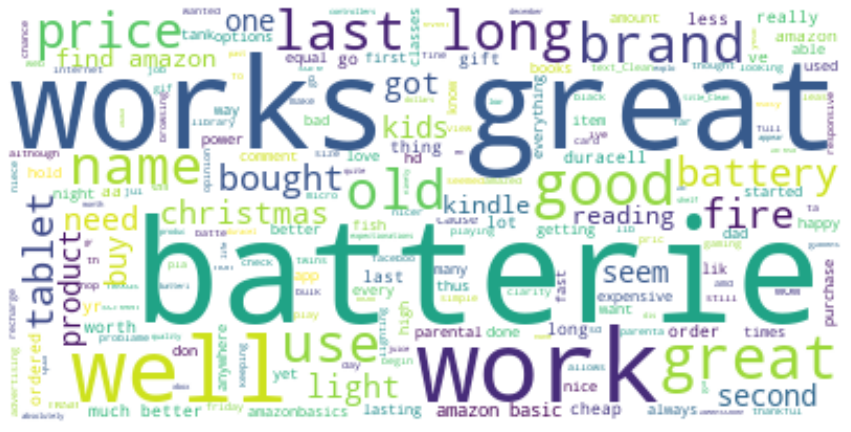

In [4]:
wcp=WordCloud(background_color='white')
wcp.generate(str(review[["text_Clean"]][review['reviews.rating']>=4]))
wcp.generate(str(review[["text_Clean","title_Clean"]]))
fig=plt.figure(1,figsize=(15,15))
plt.imshow(wcp,interpolation='bilinear')
plt.axis('off')
plt.show()

 #extract review with rate score <=3 as Negative review.

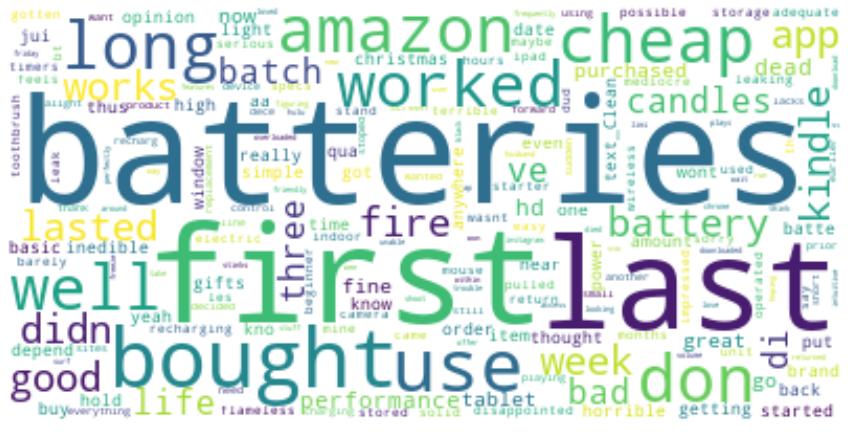

In [5]:
wcn=WordCloud(background_color='white')
wcn.generate(str(review[["text_Clean"]][review['reviews.rating']<=3]))
fig=plt.figure(1,figsize=(15,15))
plt.imshow(wcn,interpolation='bilinear')
plt.axis('off')
plt.show()

From results, we can see that:  \
1.For positive review, most of the comments seem positive, like "good","great","well". \
2.For negative review, the number of positive words obviously decrease. \
3.Also, we can conclude that battery is the most popular product. 